In [1]:
import imageio as igio
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def my_mse( A, B):
    counter = 0
    for i in range(0,A.shape[0]):
        for j in range(0,A.shape[1]):
            counter += (A[i,j]- B[i,j])*(A[i,j]- B[i,j])
    return str(np.sqrt(counter))
#     print( 'aaa: ', str(np.sqrt(counter) ))
    
def fun1(img, thresh = 125):
    im_shape = img.shape
    im_size = im_shape[0]*im_shape[1]
        
    counter = np.zeros([1,2])
        
    T_i = 125
    T = int(thresh)
    c = 0
    
    im = []
    while( np.abs(T_i - T) > 0.5 ):
#       if( c == 0 ):
#           T_i = TT
        print(str(T_i) + ' >?-1 ' + str(T))
        im = np.copy(img)
        counter = np.zeros([1,2])
        counter_pix = np.zeros([1,2])
            
        for i in range(1,im_shape[0]):
            for j in range(1,im_shape[1]):
                if( im[i,j] <= T ):
                    counter_pix[0,0] += im[i,j]
                    im[i,j] = 0
                    counter[0,0] += 1
                else:
                    counter_pix[0,1] += im[i,j]
                    im[i,j] = 1
                    counter[0,1] += 1
            
        G1 = counter_pix[0,0] / counter[0,0]
        G2 = counter_pix[0,1] / counter[0,1]
            
        if(counter[0,0] == 0):
            G1 = 0
        if(counter[0,1] == 0):
            G2 = 0
        T = T_i
        T_i = 0.5*(G1+G2)
        print(str(T_i) + ' >? ' + str(T))
        print( str(G1) + ' + ' + str(G2), end = '\n' )
#             plt.figure(figsize = (10,10))
#             plt.imshow(im[:,:]*255, cmap = plt.get_cmap(name = 'gray'))
#             plt.colorbar()
            
        c += 1
    return im

In [3]:
def fun2( img, size_filter, w ):
    im_shape = img.shape
#         print(im_shape)
        
    im_vector = np.zeros([1,im_shape[0]*im_shape[1]]) #vectorized of original image
    im_vector1 = np.zeros([1,im_shape[0]*im_shape[1]]) #temporal
#         print(im_shape[0]*im_shape[1])
        
    im_vector2 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #vectorized of original image with pos -1 +1 
    im_vector3 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #temporal
#         print(im_shape[0]*im_shape[1]+2)
        
    im_vector3[0] = img[im_shape[0]-1,im_shape[1]-1] 
    im_vector3[0,im_shape[0]*im_shape[1]+2 - 1] = img[0,0]
        
    idx = 0
    for i in range(0,im_shape[0]):
        for j in range(0,im_shape[1]):
            im_vector[0,idx] = img[i,j]
            idx += 1
                
#         print(im_vector)
    im_vector3[0,1:im_shape[0]*im_shape[1]+1] = im_vector[0,:]
#         print(im_vector3)
                    
    filter = w #[0.5,0.3,0.2]
    n = int(np.floor( w.shape[1]/2 ))
#         print(filter)
        
    for i in range(n,im_shape[0]*im_shape[1]+2-n):
        counter = 0
        i_x = i - n
        for x in range( 0, w.shape[1] ):
            counter += im_vector3[0, i_x] + filter[0, x]
            
        im_vector2[0,i-1] = counter # im_vector3[0,i-1] * filter[0] + im_vector3[0,i] * filter[1] + im_vector3[0,i+1] * filter[2]
#             print( str(im_vector3[0,i-1])+'*'+str(filter[0])+' + '+str(im_vector3[0,i])+'*'+str(filter[1])+' + '+str(im_vector3[0,i+1])+'*'+str(filter[2])+' = '+str(im_vector2[0,i-1]))
#         print(im_vector2)
        
    idx = 0
    for i in range(0,im_shape[0]):
        for j in range(0,im_shape[1]):
            img[i,j] = im_vector2[0,idx]
            idx += 1
#         plt.figure(figsize = (10,10))
#         plt.imshow(im[:,:], cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()
    return img


In [4]:
def fun3(im, size_filter, w):
    
    III = np.zeros([ im.shape[0]+2, im.shape[1]+2])
#         print(III)
        
    III[0,1:III.shape[1]-1] = im[0,:] ##top row
    III[III.shape[0]-1,1:III.shape[1]-1] = im[im.shape[0]-1,:].shape ##down row

    III[1:III.shape[0]-1,0] = im[:,0].shape ##first column
    III[1:III.shape[0]-1,III.shape[1]-1] = im[:,im.shape[1]-1].shape ##last column

    #corners
    III[0,0] = im[0,0] #left up
    III[III.shape[0]-1,0] = im[im.shape[0]-1,0] #left down
    III[0,III.shape[1]-1] = im[0,im.shape[1]-1] #right up
    III[III.shape[0]-1,III.shape[1]-1] = im[im.shape[0]-1,im.shape[1]-1] #right down

    III[1:III.shape[0]-1,1:III.shape[1]-1] = im[0:im.shape[0],0:im.shape[1]] #inside matrix

#         print(III)
        
#         w = [[-1,-1,-1],
#              [0,0],
#              [1,1,1]]
#         ww = np.zeros([3,3])
    ww = w#np.array(w)
#         print(ww)
        
    II_c = np.zeros([im.shape[0],im.shape[1]])
#         print(II_c)

#         plt.figure(figsize = (5,5))
#         plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()

    for i in range(1,III.shape[0]-1):
        for j in range(1,III.shape[1]-1):
            c = 0
            i_x = i - 1 
            for x in range(0,ww.shape[0]):
                i_y = j - 1
                for y in range(0,ww.shape[1]):
                    c += ww[x,y] * III[i_x,i_y]
    #                 print(str(ww[x,y]) + ' ' + str(III[i_x,i_y]))
                    i_y += 1
                i_x += 1
            II_c[i-1,j-1] = c
#         print(II_c)
    II_c = II_c.astype('uint8')

#         my_fun(II_c,method=1)

#     plt.figure(figsize = (10,10))
#     plt.imshow(II_c[:,:], cmap = plt.get_cmap(name = 'gray'))
#     plt.colorbar()
    return II_c

In [5]:
def fun4(im, size_filter):
    III = np.zeros([ im.shape[0]+2, im.shape[1]+2])
#         print(III)
        
    III[0,1:III.shape[1]-1] = np.zeros(im[0,:].shape) ##top row
    III[III.shape[0]-1,1:III.shape[1]-1] = np.zeros(im[im.shape[0]-1,:].shape) ##down row

    III[1:III.shape[0]-1,0] = np.zeros(im[:,0].shape) ##first column
    III[1:III.shape[0]-1,III.shape[1]-1] = np.zeros(im[:,im.shape[1]-1].shape) ##last column

    #corners
    III[0,0] = im[0,0] #left up
    III[III.shape[0]-1,0] = im[im.shape[0]-1,0] #left down
    III[0,III.shape[1]-1] = im[0,im.shape[1]-1] #right up
    III[III.shape[0]-1,III.shape[1]-1] = im[im.shape[0]-1,im.shape[1]-1] #right down

    III[1:III.shape[0]-1,1:III.shape[1]-1] = im[0:im.shape[0],0:im.shape[1]] #inside matrix

#         print(III)
        
    II_c = np.zeros([im.shape[0],im.shape[1]])
#         print(II_c)

#         plt.figure(figsize = (5,5))
#         plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()
        
    w = np.zeros([1,9])
    print(w.shape)
    cc = 0
        
    for i in range(1,III.shape[0]-1):
        for j in range(1,III.shape[1]-1):
            i_x = i - 1 
            for x in range(0,3):
                i_y = j - 1
                for y in range(0,3):
                    w[0,cc] = III[i_x,i_y]
                    cc += 1
                    i_y += 1
                i_x += 1
#                 print(cc)
            if( cc == w.shape[1] ):
                w = np.sort(w)
                c = 0
#               print(w)
                if( np.mod(int(w.shape[1]),2) != 0 ):
                    c = w[0,int(np.floor(w.shape[1]/2))]
                else:
                    c = w[0,int(w.shape[1]/2)]
                II_c[i-1,j-1] = c
                w = np.zeros([1,9])
                cc = 0
#         print(II_c)

    II_c = II_c.astype('uint8')

    return II_c
#     plt.figure(figsize = (10,10))
#     plt.imshow(II_c[:,:], cmap = plt.get_cmap(name = 'gray'))
#     plt.colorbar()

In [6]:
def my_fun( filename='baboon.png', method='1', TT=125, size_filter=0, w=[] ):
    
    im_source =igio.imread(filename)
    im_ori = np.copy(im_source)
    
    plt.figure(figsize = (10,10))
    plt.imshow(im_source, cmap = plt.get_cmap(name = 'gray'))
    plt.colorbar()
    
    im_res = []
    if( method == 1 ):
        im_res = fun1(img = im_source, thresh = TT)
    
    if( method == 2 ):
        im_res = fun2( img = im_source, size_filter = size_filter , w = w )
    
    if( method == 3 ):
        im_res = fun3( im = im_source, size_filter = size_filter, w = w )
        im_res = fun1( img = im_res, thresh = TT )
    
    if( method == 4 ):
        im_res = fun4( im = im_source, size_filter = size_filter)
        
    plt.figure(figsize = (10,10))
    plt.imshow(im_res, cmap = plt.get_cmap(name = 'gray'))
    plt.colorbar()

    print('mse: ' + str(my_mse(im_ori,im_res)))

baboon.png
4
5
(1, 9)


/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


mse: 3835.0239894947204


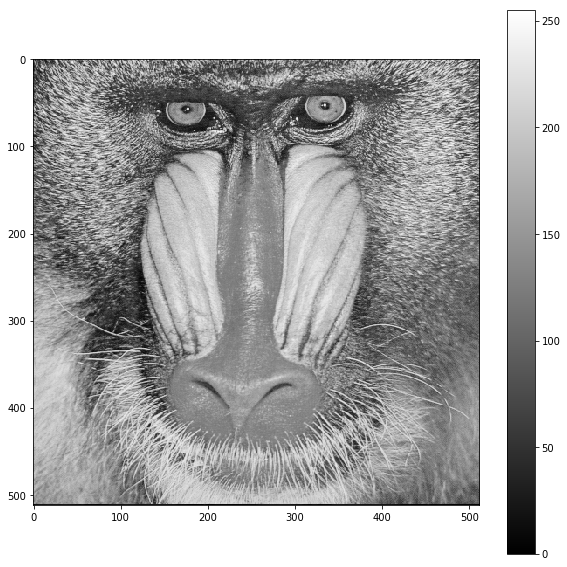

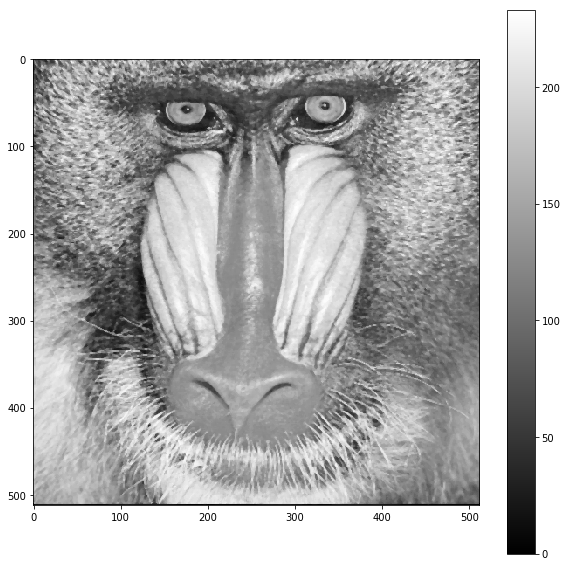

In [18]:
#def my_fun( filename='frame0.jpg', method='1', TT=125, size_filter=0, w=[] ):
filename = str(input()).rstrip()
# R = igio.imread(filename)

method = int(input())
if( method == 1):
    T =  int(input())
    my_fun(filename,method=method,TT=T)
elif( method == 2 ):
    size_filter = int(input())
    w = np.zeros([1,size_filter])
    for i in range(0,size_filter):
        w[0,i] = int(input())
    my_fun(filename,method=method, size_filter=size_filter, w=w)
elif( method == 3 ):
    size_filter = int(input())
    w = np.zeros([size_filter,size_filter])
    for i in range(0,size_filter):
        for j in range(0,size_filter):
            w[i,j] = int(input())
    T =  int(input())
    my_fun(filename,method=method,TT=T, size_filter=size_filter, w=w)
elif( method == 4 ):
    size_filter = int(input())
    my_fun(filename,method=method, size_filter=size_filter)

In [8]:
I = [[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[19,20,21,22,23,24],[25,26,27,28,29,30],[31,32,33,34,35,36]]
print(I)
II = np.zeros([6,6])
print(II)
II = np.array(I)
print(II)

[[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 24], [25, 26, 27, 28, 29, 30], [31, 32, 33, 34, 35, 36]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]


In [9]:
w = [[-1,-1,-1],[0,0,0],[1,1,1]]
ww = np.zeros([3,3])
print(w)
ww = np.array(w)
print(ww)

[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [10]:
III = np.zeros([ II.shape[0]+2, II.shape[1]+2])
print(III)
III[0,1:III.shape[1]-1] = II[0,:]
III[III.shape[0]-1,1:III.shape[1]-1] = II[II.shape[1]-1,:]

III[1:III.shape[0]-1,0] = II[:,0]
III[1:III.shape[0]-1,III.shape[1]-1] = II[:,II.shape[1]-1]

III[0,0] = II[0,0]
III[III.shape[0]-1,0] = II[II.shape[0]-1,0]
III[0,III.shape[1]-1] = II[0,II.shape[1]-1]
III[III.shape[0]-1,III.shape[1]-1] = II[II.shape[1]-1,II.shape[1]-1]

III[1:III.shape[0]-1,1:III.shape[1]-1] = II[0:II.shape[0],0:II.shape[1]]

print(III)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.  1.  2.  3.  4.  5.  6.  6.]
 [ 1.  1.  2.  3.  4.  5.  6.  6.]
 [ 7.  7.  8.  9. 10. 11. 12. 12.]
 [13. 13. 14. 15. 16. 17. 18. 18.]
 [19. 19. 20. 21. 22. 23. 24. 24.]
 [25. 25. 26. 27. 28. 29. 30. 30.]
 [31. 31. 32. 33. 34. 35. 36. 36.]
 [31. 31. 32. 33. 34. 35. 36. 36.]]


[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]
[[18 18 18 18 18 18]
 [36 36 36 36 36 36]
 [36 36 36 36 36 36]
 [36 36 36 36 36 36]
 [36 36 36 36 36 36]
 [18 18 18 18 18 18]]


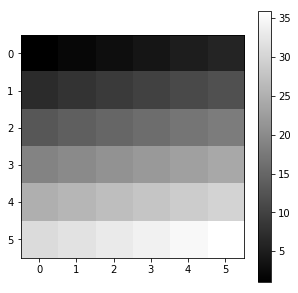

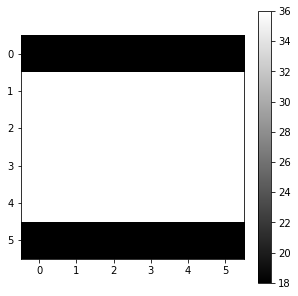

In [11]:
II = np.array(I)
II_c = np.array(II)
print(II_c)

plt.figure(figsize = (5,5))
plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
plt.colorbar()

for i in range(1,III.shape[0]-1):
    for j in range(1,III.shape[1]-1):
        c = 0
        i_x = i - 1 
        for x in range(0,ww.shape[0]):
            i_y = j - 1
            for y in range(0,ww.shape[1]):
                c += ww[x,y] * III[i_x,i_y]
#                 print(str(ww[x,y]) + ' ' + str(III[i_x,i_y]))
                i_y += 1
            i_x += 1
        II_c[i-1,j-1] = c
print(II_c)

plt.figure(figsize = (5,5))
plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
plt.colorbar()       

In [12]:
v = 9
print(v)

9


In [13]:
x = np.ones([1,10])*random.random() +list(range(0,10))
print(np.sort(x))

[[0.19068226 1.19068226 2.19068226 3.19068226 4.19068226 5.19068226
  6.19068226 7.19068226 8.19068226 9.19068226]]
